# Laboratorium 8 Page Rank
### Autor: Krzysztof Hardek

In [191]:
import networkx as nx 
import csv
import matplotlib.pyplot as plt
import numpy as np

# versions
print(nx.__version__)
print(csv.__version__)
print(np.__version__)

2.4
1.0
1.18.4


## Zad 1 Prosty ranking wierzchołków  

### Funkcje pomocnicze:

In [184]:
# czyta graf z pliku
def read_graph(filename):
    G = nx.DiGraph(name='graph')
    with open(filename, "r") as file:
        csv_reader = csv.reader(file, delimiter=",")
        for row in csv_reader:
            s = int(row[0])
            t = int(row[1])
            G.add_edge(s, t)
        
    return G

# rysuje graf
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)

# tworzy macierz, której dominujący wektor będzie liczony    
def adj_matrix(G):
    n = len(G)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if (i, j) in G.edges:
               A[j][i] = 1/G.out_degree(i)
    
    return A

# metoda potęgowa
def power_iteration(A, i_max, e_min, x0):
    x0 = x0.copy()
    e = e_min + 1
    i = 0

    while i < i_max and e > e_min:
        tmp_x0 = x0
        x0 = np.dot(A, x0)
        x0 = x0 / np.linalg.norm(x0, ord=np.inf)
        e = np.linalg.norm(np.subtract(np.absolute(x0), np.absolute(tmp_x0)))
        i += 1
    
    return x0 / np.linalg.norm(x0, ord=1) #, l

# uproszczony algorytm page rank
def simple_page_rank(G, x0):
    A = adj_matrix(G)
    x0 = power_iteration(A, 1000, 10**-6, x0)
    return x0

### Grafy Testowe
#### Prosty graf z dołączonego artykułu

[0.39999994 0.19999997 0.4000001 ]


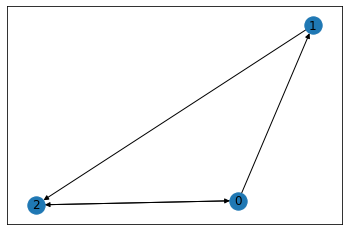

In [178]:
G = read_graph("a.csv")
xh = np.ones(len(G))
print(simple_page_rank(G, xh))
draw_graph(G)

Mój wynik jest prawie taki sam jak w artykuje (różnice wynikają z użycia metody przybliżającej rozwiazanie).

#### Grafy powyżej 10 wierzchołków, silnie spójne.
Grafy stworzone zostały za pomocą funkcji gn_graph z biblioteki networkx. Zostały do tych grafów dodane ręcznie krawędzie, tak aby stały się silnie spójne  

Pierwszy Graf

True
[0.30780911 0.35004565 0.12093588 0.00729262 0.03646307 0.02917045
 0.00729262 0.11668186 0.02066242 0.00273473 0.00091158]


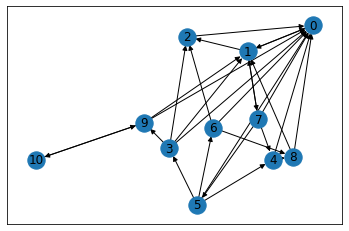

In [179]:
H = read_graph("b.csv")
xh = np.ones(len(H))
print(nx.is_strongly_connected(I))
print(simple_page_rank(H, xh))
draw_graph(H)

Drugi graf

True
[0.16655564 0.01865424 0.023984   0.01199201 0.26515657 0.16922052
 0.1199201  0.023984   0.19053959 0.00333111 0.00666223]


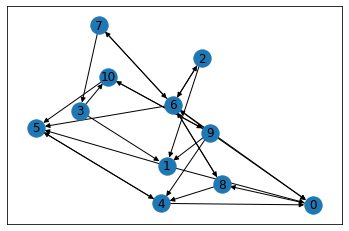

In [181]:
I = read_graph("c.csv")
xi = np.ones(len(I))
print(nx.is_strongly_connected(I))
print(simple_page_rank(I, xi))
draw_graph(I)

Trzeci graf

True
[0.15017669 0.04328621 0.04946996 0.21643112 0.17226151 0.13250881
 0.07508834 0.04946996 0.04328621 0.02473499 0.04328621]


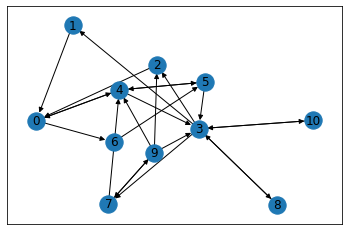

In [182]:
J = read_graph("d.csv")
xj = np.ones(len(J))
print(nx.is_strongly_connected(J))
print(simple_page_rank(J, xj))
draw_graph(J)

### Wnioski

W grafach bardziej "oblegane" wierzchołki są usytuowane niżej w rankingu niż te mniej związene z grafem. Algorytm zwraca poprawne wyniki, zgodne z oczekiwaniami. Grafy muszą być silnie spójne alby nie wystąpił "rank sink" opisany w artykule. 

## Zad 2 Page Rank